In [1]:
import pandas as pd 
import numpy as np 
from datetime import date
import matplotlib.pyplot as plt 
import statsmodels.api as sm
df = pd.read_csv('train.csv')

In [2]:
len(df) # Total No. of days Data

1096

In [3]:
df.iloc[[1095]]

,date,aedvolume
1095,31-12-2018,14632817


In [4]:
d0 = date(2016, 1,1 )
d1 = date(2017, 12, 31)
delta = d1 - d0
print(delta.days)


730


In [5]:

df1 = pd.read_csv('train.csv', nrows = 731)

In [6]:

df1.tail()

,date,aedvolume
726,27-12-2017,20855859
727,28-12-2017,21852295
728,29-12-2017,20332225
729,30-12-2017,20128568
730,31-12-2017,22189638


In [7]:
#Subsetting the Training Data from Jan 2016 to Oct 2018
d2 = date(2016, 1,1 )
d3 = date(2018, 10, 30)
delta = d3 - d2
print(delta.days)

1033


In [8]:

train=df[0:1035] 
print(train)
test=df[1035:] # Testing Data from Nov 2018 to Dec 2018
print(test)


            date  aedvolume
0     01-01-2016   13778988
1     02-01-2016   16747480
2     03-01-2016   14175517
3     04-01-2016   20968656
4     05-01-2016   18157129
...          ...        ...
1030  27-10-2018   16851525
1031  28-10-2018   16905790
1032  29-10-2018   19336782
1033  30-10-2018   24761572
1034  31-10-2018   26563316

[1035 rows x 2 columns]
            date  aedvolume
1035  01-11-2018   24410879
1036  02-11-2018   19029744
1037  03-11-2018   17192628
1038  04-11-2018   18724528
1039  05-11-2018   19732682
...          ...        ...
1091  27-12-2018   17831056
1092  28-12-2018   15540769
1093  29-12-2018   13784600
1094  30-12-2018   13584611
1095  31-12-2018   14632817

[61 rows x 2 columns]


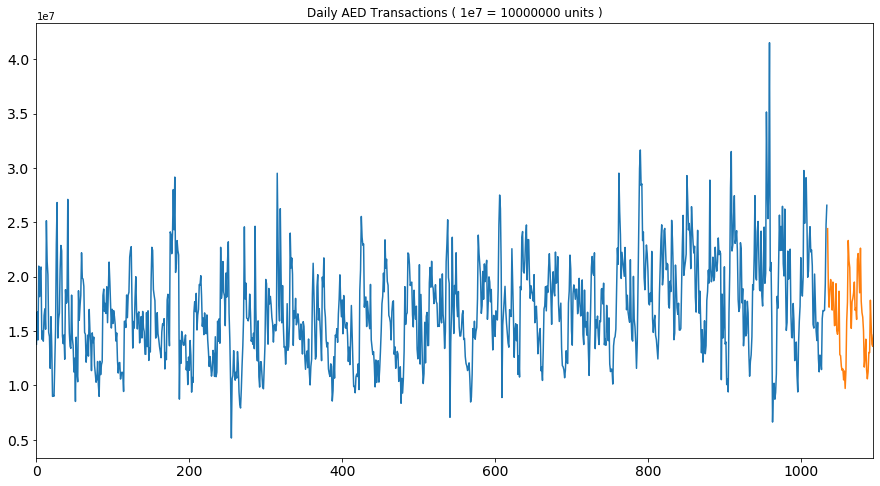

In [9]:
train.aedvolume.plot(figsize=(15,8), title= 'Daily AED Transacations', fontsize=14) #Test Data
test.aedvolume.plot(figsize=(15,8), title= 'Daily AED Transactions ( 1e7 = 10000000 units )', fontsize=14) #Train Data
plt.show()

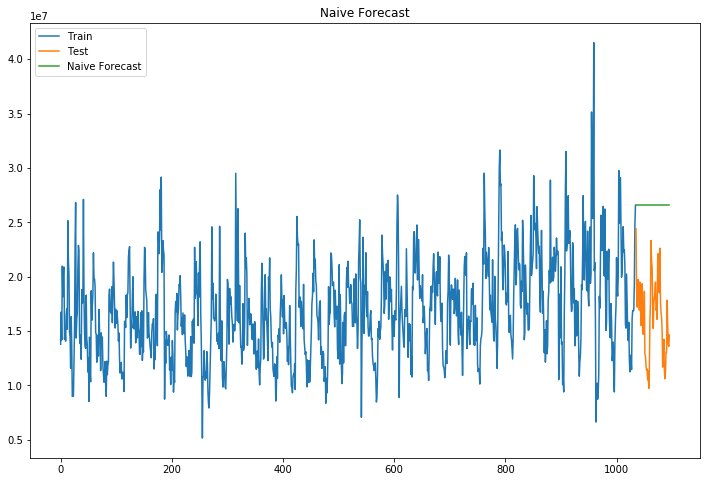

In [10]:
#Using Naive Approach
dd= np.asarray(train.aedvolume)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['aedvolume'], label='Train')
plt.plot(test.index,test['aedvolume'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [11]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 = sqrt(mean_squared_error(test.aedvolume, y_hat.naive))
print(rms1)

# Calculate RMSE value to check to accuracy of our model on test data set. 
#The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) 
#is a frequently used measure of the differences between values (sample or 
#population values) predicted by a model or an estimator and the values observed

#a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data.
#In general, a lower RMSD is better than a higher one.

10939995.241793163


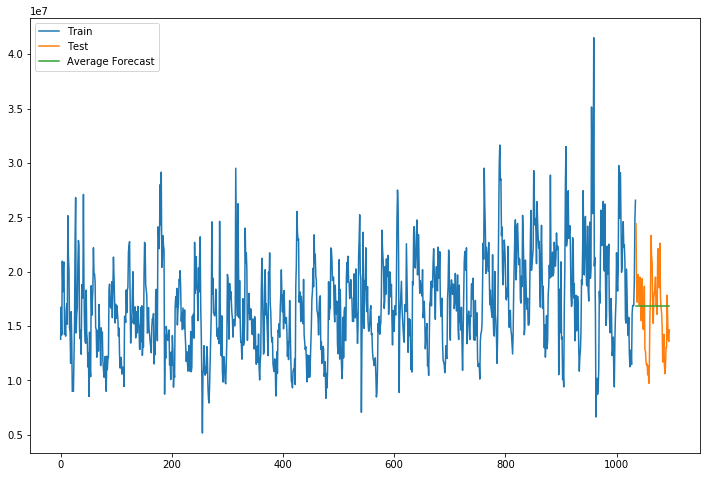

In [12]:
# Naive Approach will not work in this case as the RSME value is very high.
# Using Simple Average
y_hat_avg = test.copy()

y_hat_avg['avg_forecast'] = train['aedvolume'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [13]:
rms2 = sqrt(mean_squared_error(test.aedvolume, y_hat_avg.avg_forecast))
print(rms2)



3590367.526534311


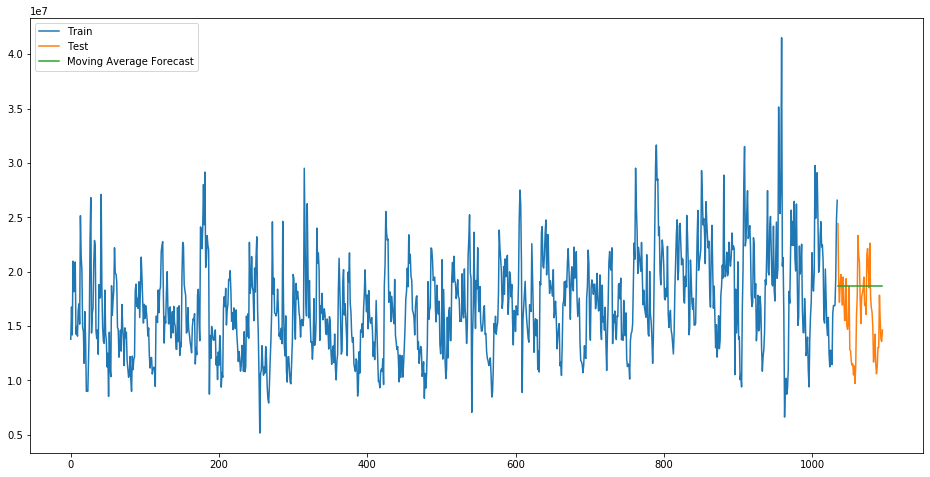

In [14]:
# This appoach would not work as the RSME value is still very high
# Using Moving Average

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['aedvolume'].rolling(60).mean().iloc[-1] #For last 2 months only
plt.figure(figsize=(16,8))
plt.plot(train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [15]:
rms3 = sqrt(mean_squared_error(test.aedvolume, y_hat_avg.moving_avg_forecast))
print(rms3)

4294771.530790982


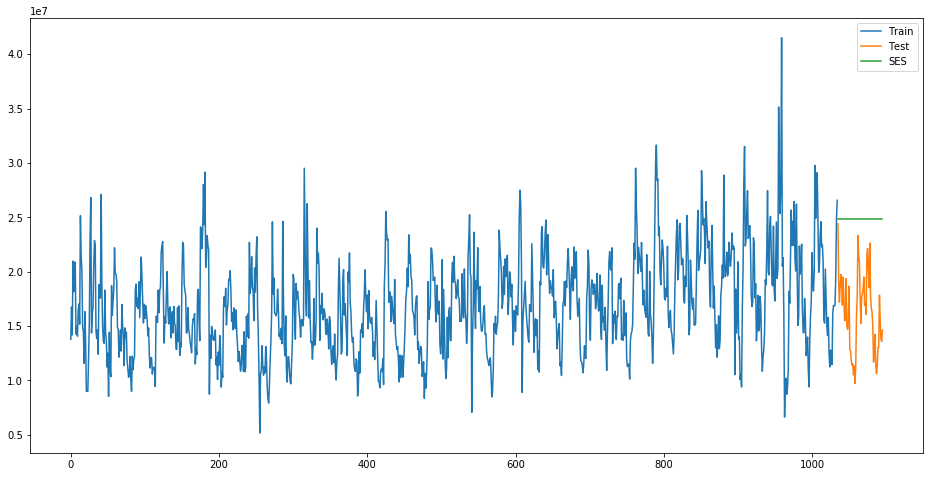

In [16]:
# Using Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['aedvolume'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

#We can see that implementing Simple exponential model with alpha as 0.6 generates a better model till now.
#We can tune the parameter using the validation set to generate even a better Simple exponential model.

In [17]:
rms4 = sqrt(mean_squared_error(test.aedvolume, y_hat_avg.SES))
print(rms4)

9295792.97265698


In [18]:
#Using Holt's Linear Trend Model


train.reset_index(inplace=True)
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
test.reset_index(inplace=True)
test['date'] = pd.to_datetime(test['date'])
test = test.set_index('date')

s=sm.tsa.seasonal_decompose(train.aedvolume,freq=30)

/home/ayon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ayon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ayon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  # This is added back by InteractiveShellApp.init_path()


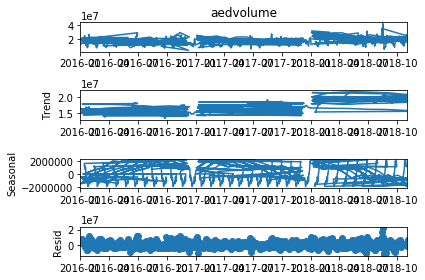

In [19]:

s.plot()
result = sm.tsa.stattools.adfuller(train.aedvolume)
plt.show()

In [20]:
#We can see from the graphs obtained that this dataset follows an increasing trend. 
#Hence we can use Holt’s linear trend to forecast the future prices.

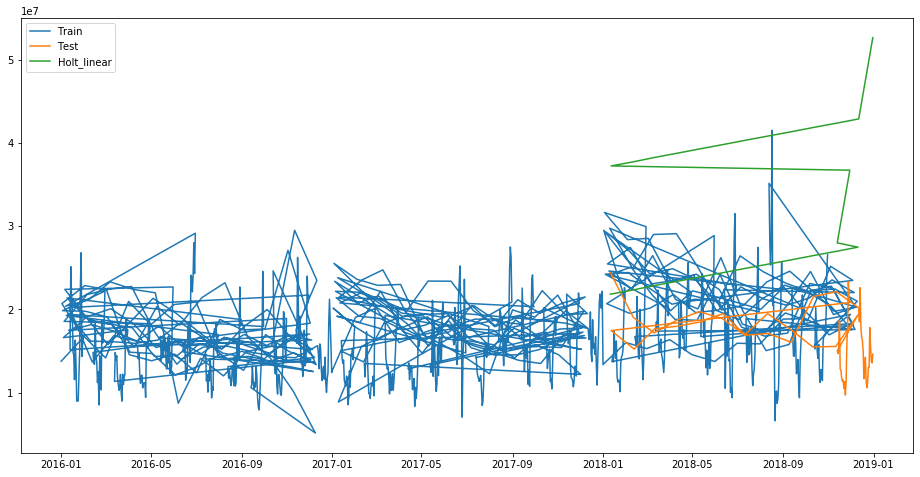

In [21]:

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['aedvolume'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [22]:
rms5 = sqrt(mean_squared_error(test.aedvolume, y_hat_avg.Holt_linear))
print(rms5)

23476128.31848625


In [23]:
print(rms1/10000000,rms2/10000000,rms3/10000000,rms4/10000000,rms5/10000000)

1.0939995241793163 0.3590367526534311 0.4294771530790982 0.929579297265698 2.347612831848625


/home/ayon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


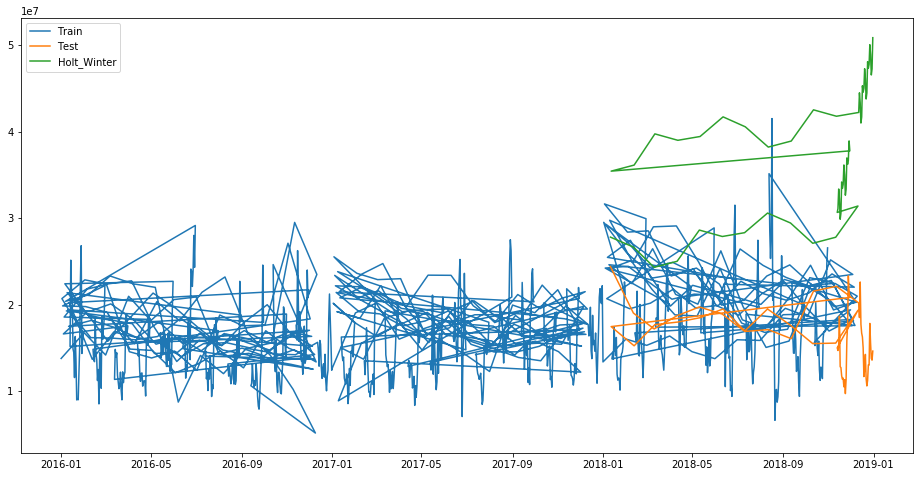

In [24]:
#Holt Winter
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['aedvolume']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [25]:
rms6 = sqrt(mean_squared_error(test.aedvolume, y_hat_avg.Holt_Winter))
print(rms6/10000000)

2.306063028182228


In [26]:

print("RSME Values for Each approaches excluding ARIMA")

print("Naive Approach :",rms1/10000000)
print("Simple Avergae :",rms2/10000000)
print("Moving Average :",rms3/10000000)
print("Simple Exponential Smoothing:",rms4/10000000)
print("Holt Linear Trend Model :",rms5/10000000)
print("Holt Winter :",rms6/10000000)

RSME Values for Each approaches excluding ARIMA
Naive Approach : 1.0939995241793163
Simple Avergae : 0.3590367526534311
Moving Average : 0.4294771530790982
Simple Exponential Smoothing: 0.929579297265698
Holt Linear Trend Model : 2.347612831848625
Holt Winter : 2.306063028182228


In [33]:
# ARIMA
from statsmodels import api as sm

y_hat_avg = test.copy()
y_hat_avg = y_hat_avg.drop('index',1)
print(y_hat_avg)

            aedvolume
date                 
2018-01-11   24410879
2018-02-11   19029744
2018-03-11   17192628
2018-04-11   18724528
2018-05-11   19732682
...               ...
2018-12-27   17831056
2018-12-28   15540769
2018-12-29   13784600
2018-12-30   13584611
2018-12-31   14632817

[61 rows x 1 columns]


In [34]:

fit1 = sm.tsa.statespace.SARIMAX(train.aedvolume, order=(1, 1, 1),seasonal_order=(1,1,0,12),enforce_stationarity=False,
                                enforce_invertibility=False).fit()
print(fit1.summary().tables[1])


/home/ayon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ayon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/ayon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ayon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7156      0.032     22.275      0.000       0.653       0.779
ma.L1         -0.9643      0.010    -96.597      0.000      -0.984      -0.945
ar.S.L12      -0.5202      0.033    -15.979      0.000      -0.584      -0.456
sigma2      2.198e+13   1.61e-16   1.36e+29      0.000     2.2e+13     2.2e+13


In [37]:
y_hat_avg['SARIMA'] = fit1.get_prediction(start=pd.to_datetime('2018-11-01'), dynamic=True)
print(y_hat_avg['SARIMA'])


date
2018-01-11    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-02-11    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-03-11    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-04-11    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-05-11    <statsmodels.tsa.statespace.mlemodel.Predictio...
                                    ...                        
2018-12-27    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-12-28    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-12-29    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-12-30    <statsmodels.tsa.statespace.mlemodel.Predictio...
2018-12-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
Name: SARIMA, Length: 61, dtype: object


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['aedvolume'], label='Train')
plt.plot(test['aedvolume'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')


In [28]:
rms7 = sqrt(mean_squared_error(test.aedvolume, pred))
print(rms7)

NameError: name 'pred' is not defined

In [ ]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())